# Data Analysis

In [39]:
import importlib
import functions
importlib.reload(functions)
functions.set_user('Laila')
data = functions.call_data_clean(p_threshold=1.3)

ATAC = data['ATAC_seq']
RNA = data['RNA_seq']

In [40]:
start = ATAC.columns.get_loc('LTHSC.34-.BM')
cols_try1 = list(ATAC.columns[start:])
subset_try1 = ATAC.iloc[3:3000, :]
#sub_try1_col = list(ATAC.loc[7:])
print(cols_try1)
# tsne_df, gini_scores = functions.tSNE(data['ATAC_seq'], data['list_ATAC_diff_Tc_gd'], 25, 30)

['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3

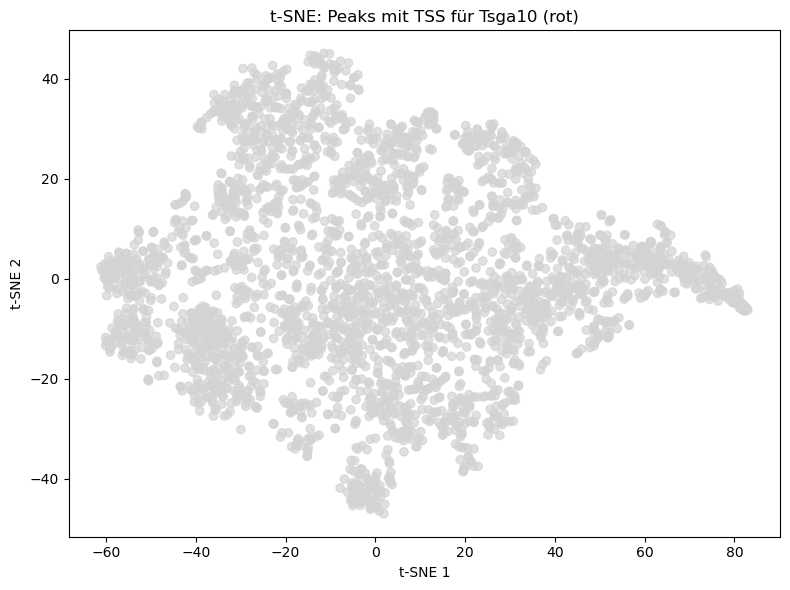

In [41]:
tsne_df, gini_scores = functions.tSNE(subset_try1, cols_try1, 25, 30, gini_coloring='Tsga10')

In [18]:
tss_mask = df.loc[cols, "TSS"] != ''
print(tss_mask.unique())
print(ATAC['TSS'].unique())

NameError: name 'df' is not defined

# Data Clean up and Normalization
---

### Set Thresholds

In [6]:
# Setting thresholds qc metrics
qc_thresholds = {
"%fragment.1Kb_TSS": ("min", 6),
"Paired.read.after.removing.PCR.duplication": ("min", 3000),
"%chrM.mapped": ("max", 5),
"Replicate.cor": ("min", 0),
"InputCellNumber": ("min", 500)
}

# Setting threshold ATAC-seq (p = 0.05)
threshold_pval = 1.3

### Removal of N/A and interfering values

In [7]:
# QC metrics
    # remove N/A 
qc_clean = Cell_population_qc.copy()
qc_clean = qc_clean.dropna(subset=[
    "%fragment.1Kb_TSS",
    "Paired.read.after.removing.PCR.duplication",
    "%chrM.mapped",
    "Replicate.cor",
    "InputCellNumber"
])

# ATAC-seq
    # show rows of infinite -log10 p values
inf_rows = ATAC_seq[ATAC_seq['_-log10_bestPvalue'].isin([np.inf, -np.inf])]

    #drop peaks with infinite -log10 p values
ATAC_seq_clean = ATAC_seq[ATAC_seq['_-log10_bestPvalue'] != np.inf]

    # range of -log10 p-values
pvalues = ATAC_seq_clean["_-log10_bestPvalue"]

min_pval = pvalues.min()
max_pval = pvalues.max()
print(f"Minimum -log10 p-value: {min_pval}")
print(f"Maximum -log10 p-value: {max_pval}")

# RNA-seq
print(RNA_seq.isna().sum().sum())
print((RNA_seq.iloc[:, 1:] < 5).sum().sum())
numerical_data=RNA_seq.iloc[:, 1:]
    #gesamtsumme berechnen
sample_sums=numerical_data.sum(axis=0)
low_sum_samples=sample_sums[sample_sums <= 100]
print(low_sum_samples)
    #varianz berechnen
sample_variance=numerical_data.var(axis=0)
low_variance_samples=sample_variance[sample_variance <= 0.5]
print(low_variance_samples)

Minimum -log10 p-value: 0.0
Maximum -log10 p-value: 260.12
0
587020
Series([], dtype: float64)
Series([], dtype: float64)


### Code for Data Filtering

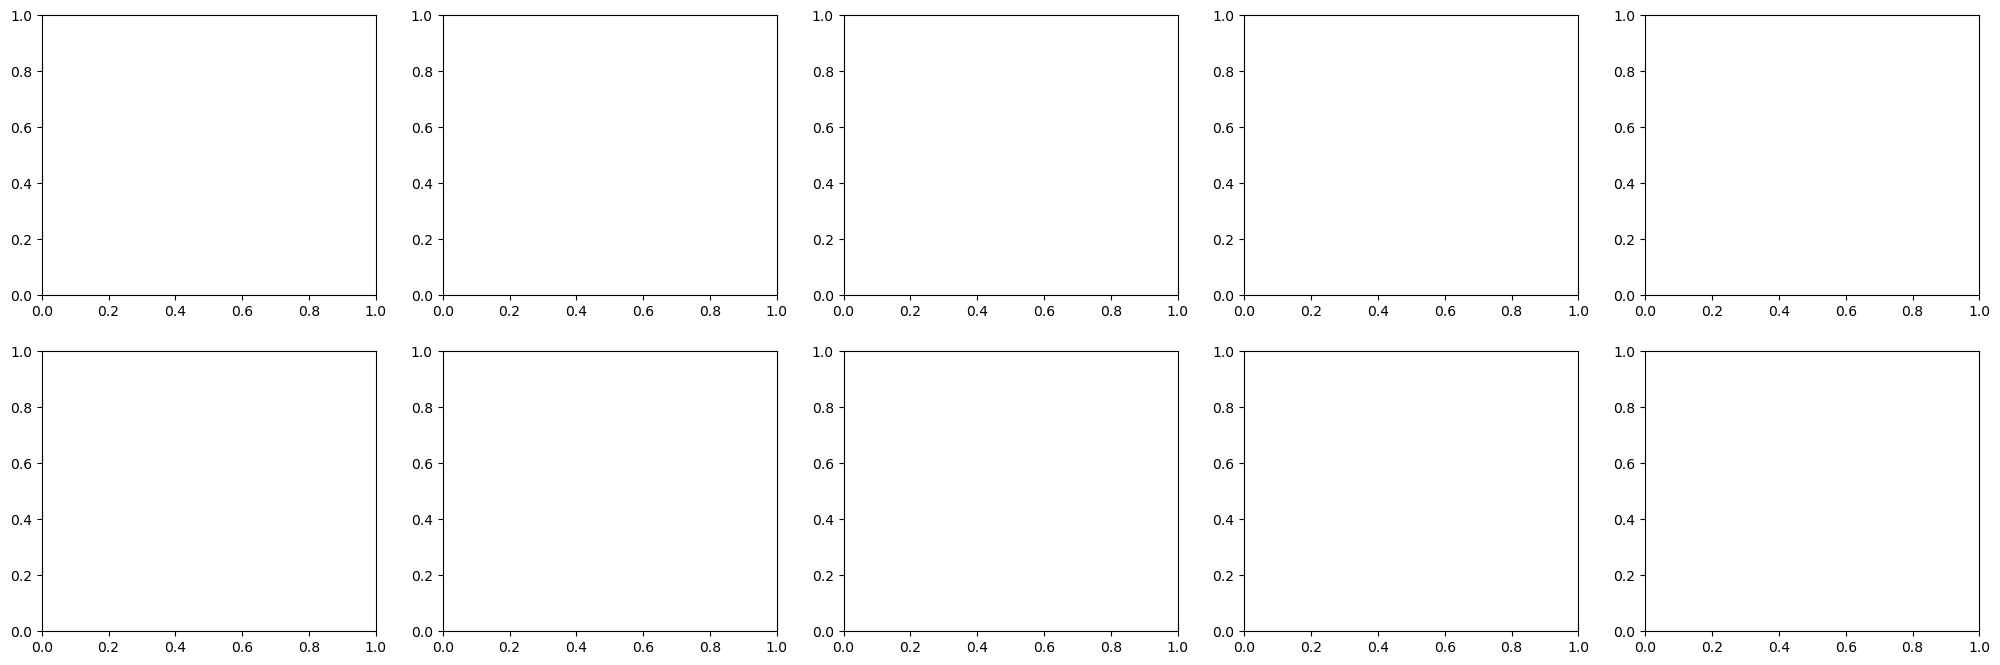

In [8]:
metrics = [
    ("%fragment.1Kb_TSS", "TSS enrichment"),
    ("Paired.read.after.removing.PCR.duplication", "nFrags"),
    ("%chrM.mapped", "chrM mapped (%)"),
    ("Replicate.cor", "Replicate correlation"),
    ("InputCellNumber", "Input cell number")
]
fig, axes = plt.subplots(2, len(metrics), figsize=(5*len(metrics), 8))

# Filtering with thresholds
def apply_qc_thresholds (df, qc_thresholds):
    import operator

    mask = pd.Series(True, index = df.index)
    for col, (bound, val) in qc_thresholds.items():
        if bound == "min":
            mask&= df[col] >= val
        elif bound == "max":
            mask&= df[col] <= val
    return df[mask].copy()

In [9]:
# QC metrics
qc_filtered = apply_qc_thresholds(qc_clean, qc_thresholds)

# Filter ATAC-seq peaks based on logp value threshold 
ATAC_seq_filtered = ATAC_seq_clean[ATAC_seq_clean["_-log10_bestPvalue"] >= threshold_pval]

# apply qc metrics on ATAC-seq
ATAC_seq_meta_cols = list(ATAC_seq_clean.loc[:,:'genes.within.100Kb'].columns)
qc_filtered_cols = list(qc_filtered['CellType'])
ATAC_qc_cell_cols = [ col for col in ATAC_seq_clean.columns if col in qc_filtered_cols]
ATAC_qc_all_cols = ATAC_seq_meta_cols + ATAC_qc_cell_cols
print(f"Behaltene Zelltypen: {len(qc_filtered_cols)}")

print(qc_filtered_cols)


Behaltene Zelltypen: 96
['proB.FrBC.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B.T1.Sp', 'B.T1.Sp', 'B.T2.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.T3.Sp', 'B.MZ.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.Fo.Sp', 'B.Fo.Sp', 'B.GC.CB.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.mem.Sp', 'B.mem.Sp', 'B.Sp', 'B.Sp', 'B.Fem.Sp', 'preT.DN3.Th', 'T.DP.Th', 'T.4.Th', 'T.4.Nve.Sp', 'T.4.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.25hi.Sp', 'T.8.Nve.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tem.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.24a+.Th', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27-11b+.BM', 'NK.27-11b+.BM', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI', 'GN.BM', 'GN.BM', 'GN.Sp', 'GN.Sp', 'GN.Thio.PC', 'GN.Thio.PC', 'GN.Thi

### Data Sets after Cleaning

### Normalization

In [11]:
RNA_seq_log2=RNA_seq.copy()
RNA_seq_log2.iloc[:, 1:]=np.log2(RNA_seq.iloc[:, 1:])

In [ ]:
print(ATAC_seq)

In [12]:
# log2-transformation
peak_signal_log = np.log2(score_abgd+1)
spaltenpositionen = [peak_signal_log.columns.get_loc(name) for name in col_ATAC_seq_ab_T]

# Exploratory Data
---

In [13]:
# Plotting of data qc
for i, (col, label) in enumerate(metrics):
    sns.violinplot(y=qc_clean[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"{label}\n(raw data)")
    sns.violinplot(y=qc_filtered[col], ax=axes[1,i], color= 'lightgreen')
    axes[1,i].set_title(f"{label}\n(filtered data)")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Variance of peak signal

In [14]:
# Extract the peakID column 
peak_id_col = ATAC_seq_filtered[["ImmGenATAC1219.peakID"]]

# Extract the accessibility score columns
score_cols = ATAC_seq_filtered.loc[:, "LTHSC.34-.BM":]

# Create data frame with only scores per peak
ATAC_scores = pd.concat([peak_id_col, score_cols], axis=1)

# calculate mean accessibility score for each peak
mean_accessibility_per_peak = ATAC_scores.mean(axis=1, numeric_only=True)

# calculate median accessibility score for each peak
median_accessibility_per_peak = ATAC_scores.median(axis=1, numeric_only=True)

# calculate standard deviation of accessibility scores for each peak
sd_accessibility_per_peak = ATAC_scores.std(axis=1, numeric_only=True)

# variance within cell type
variance_within_cell = ATAC_scores.var(axis = 0, numeric_only = True)

# variance across cell types (for each peak)
variance_across_cells = ATAC_scores.var(axis = 1, numeric_only=True)

# create summary data frame
mean_med_sd_df = pd.DataFrame({
    "Mean Accessibility": mean_accessibility_per_peak,
    "Median Accessibility": median_accessibility_per_peak,
    "Standard Deviation": sd_accessibility_per_peak,
    "Variance across cells": variance_across_cells,
})

#print(ATAC_scores)
#print(mean_accessibility_per_peak)
#print(mean_med_sd_df)
print(mean_med_sd_df)
print(variance_within_cell)



        Mean Accessibility  Median Accessibility  Standard Deviation  \
2                 1.521000                 0.495            6.716484   
3                 0.874556                 0.530            1.533709   
4                 0.882111                 0.630            0.816587   
5                 1.096556                 0.785            1.218798   
6                 0.944556                 0.680            1.262417   
...                    ...                   ...                 ...   
512588            5.823889                 4.955            3.648828   
512589            5.526444                 4.705            4.053177   
512590            6.936111                 5.775            4.887909   
512591            6.995111                 6.440            4.386282   
512594            1.751778                 1.420            1.481127   

        Variance across cells  
2                   45.111153  
3                    2.352263  
4                    0.666815  
5      

### PCA RNA-seq

In [ ]:
#ohne gennamen
data=RNA_seq_log2.iloc[:, 1:]
#auswahl der 1000 variablesten gene
variances=data.var(axis=1)
top_genes=variances.nlargest(1000).index
#transponieren
data_T=data.T
#mittelwertzentrierung?
data_centered=data_T-data_T.mean(axis=0)
# matrix mit Kovarianz
cov_matrix=np.cov(data_centered, rowvar=False)
# Eigenwerte und Eigenvektoren
eig_vals, eig_vecs=np.linalg.eigh(cov_matrix)
# ansteigend sortieren
sorted_idx=np.argsort(eig_vals)[::-1]
eig_vals=eig_vals[sorted_idx]
eig_vecs=eig_vecs[:, sorted_idx]
#ersten zwei PCs
pc1=data_centered @ eig_vecs[:, 0]
pc2=data_centered @ eig_vecs[:, 1]
#plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)
#achsen labeln
for i, sample in enumerate(data_T.index):
    plt.text(pc1[i] + 0.2, pc2[i], sample, fontsize=9)

plt.xlabel(f"PC1 ({eig_vals[0]/eig_vals.sum()*100:.1f}%)")
plt.ylabel(f"PC2 ({eig_vals[1]/eig_vals.sum()*100:.1f}%)")
plt.title("PCA der RNA-Seq Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
score_gd= ATAC_seq[col_ATAC_seq_gd_T]
peak_signal_gd_log = np.log2(score_gd+1)
type(peak_signal_gd_log)


NameError: name 'ATAC_seq' is not defined

In [ ]:
# def t-SNE
def tSNE (df, cols, components, perplexity, rows=None, gini_coloring=None):
    '''
    df: normalized pandas.df [rows x cols];
    cells: list of row names;
    components: no. of PCAs < len(rows);
    perplexity: perplexity < len(rows);
    gini_coloring: feature that should be colored, automatically maximun, manually after e.g. specifig cell / TSS
    '''
    
    # preparation of data
    if rows is not None:
        subset_df = df.loc[rows, cols]
    else:
        subset_df = df.loc[:,cols]
    components = min(components, subset_df.shape[0], subset_df.shape[1])
    perplexity = min(perplexity, subset_df.shape[0] - 1)

    # PCA
    pca = PCA(n_components= components)
    pcs = pca.fit_transform(subset_df)

    # t-SNE
    tsne = sklm.TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(pcs)
    tsne_df = pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2'], index=subset_df.index)

    # gini index
    def gini_index (x):
        x = np.array(x)
        x = np.sort(x)
        n = len(x)
        if np.mean(x) == 0:
            return 0.0
        diff_sum = np.abs(np.subtract.outer(x, x)).sum()
        return diff_sum / (2 * n**2 * np.mean(x))
    
    gini_scores = subset_df.apply(gini_index, axis=0)
    
    # coloring
    if gini_coloring is None:
        name_gini_coloring = gini_scores.idxmax()
    elif isinstance(gini_coloring, int):
        name_gini_coloring = subset_df.columns[gini_coloring]
    else:
        name_gini_coloring = gini_coloring

    color_values = subset_df[name_gini_coloring].values

    # plot
    plt.figure(figsize=(8,6))
    sc = plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=color_values, cmap='viridis', alpha=0.7)
    plt.colorbar(sc, label=f'activity of {name_gini_coloring}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f't-SNE, colored with gini index after peak: {name_gini_coloring}')
    plt.tight_layout()
    plt.show()

    return tsne_df, gini_scores

In [ ]:
tsne_df, gini_scores = tSNE(ATAC_seq, col_ATAC_seq_gd_T, 25, 30)

# Discriptive and Comparative Analysis

In [ ]:
test.kvv

# Statistical Analysis and Regression Models

In [ ]:
## Test lf 